In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataset_path = Path(r"../data/blue_waters_posix_with_paths_no_outliers_no_time.csv")

In [3]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

707276

In [5]:
df_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0,0,0,0,184,0.970498,213,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0,0,0,0,0,147.540409,80,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0,0,0,0,-1,24.994056,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0,0,0,0,127,0.487127,394,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
4,194995,-2560,-2560,10229035,2168343,4553213,888833,0,1,-2560,...,0,0,0,0,0,105.039295,32,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...


In [6]:
df_no_outliers.exe.unique()

array(['Hsigma', 'SpEC', 'mdtest', 'ph.x', 'nek5000', 'ior',
       'init_atmosphere_model', 'ApplyObservers', 'volumeStats', 'pw.x',
       'real.exe', 'enzo.exe', 'ppm_vortex', 'bands.x', 'scheduler.x',
       'ph5example', 'harm3d', 'Radiate08', 'zeusmpi', 'Radiate10',
       'vasp_ncl', 'runRSQSim', 'emod3d-mpi', 'caliop',
       'vasp54withoutneb', 'run', 'lmp_new', 'wrf.exe',
       'iobubble_sicpr300d2p5nobub', 'vasp_std', 'iobubble_sicpr300d2p5',
       'iobubble_res32', 'iobubble_res80', 'penc_comm_CAF.x',
       'comm_penc_CAF.x', 'lmp_xe6_kc_s', 'pp.x', 'GW_Chimera3D',
       'Radiate', 'nemo3d-x86_64_intel16_64_mpi_intelfast_bluewaters.ex',
       'vasp.5.4.4-neb-BW', 'gslatticeqmc', 'process_chi_sample_new',
       'process_chi_CCN_single_diam', 'vasp', 'Spells', 'CAT', 'cm1.exe',
       'metgrid.exe', 'projwfc.x', 'exec_0.75_1.25_io', 'mosst_dynamo.x',
       'vasp_gam', 'exec', 'PeleC3d.intel.interlagos.MPI.ex.H2.11272019',
       'time_scales.x', 'Alya.x', 'wsmp_general

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [7]:
df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).head(20)

exe
SpEC              324186
mosst_dynamo.x     69418
vasp_gam           65034
Spells             40638
pw.x               28149
ApplyObservers     27225
enzo.exe           26941
flash4             23995
scheduler.x        15058
lmp_new            12815
ior                 6954
caliop              6589
mdtest              6563
sord-mO             5220
PIOL-FFD            5136
Hsigma              3568
nwchem              3308
nek5000             3018
h_r_f               2762
lmp_kc_dep          2489
Name: nprocs, dtype: int64

In [8]:
most_used_apps = df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).index
len(most_used_apps)

621

<Axes: xlabel='POSIX_TOTAL_TIME'>

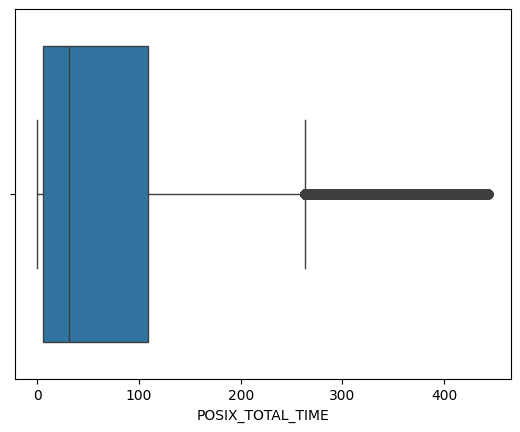

In [9]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [10]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,707276.0,2.054794e+04,5.828860e+04,0.000000e+00,176.000000,3411.000000,1.928900e+04,8.365835e+06
POSIX_FILENOS,707276.0,-1.078539e+03,9.265773e+03,-2.160071e+06,-1026.000000,-580.000000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,707276.0,-1.078539e+03,9.265773e+03,-2.160071e+06,-1026.000000,-580.000000,-2.000000e+01,-1.000000e+00
POSIX_READS,707276.0,1.369732e+06,1.975957e+07,0.000000e+00,8516.000000,129551.000000,1.707586e+06,5.071598e+09
POSIX_WRITES,707276.0,3.278359e+06,3.261562e+07,0.000000e+00,5110.750000,137511.000000,1.260049e+06,1.302770e+10
...,...,...,...,...,...,...,...,...
WRITE_1G_PLUS,707276.0,4.049197e-02,5.291079e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.176000e+03
rank,707276.0,4.240996e+00,1.213815e+02,-1.000000e+00,-1.000000,-1.000000,0.000000e+00,3.435200e+04
POSIX_TOTAL_TIME,707276.0,6.985594e+01,8.570745e+01,1.096725e-05,5.437043,31.145747,1.084891e+02,4.433974e+02
nprocs,707276.0,1.145457e+02,1.948942e+03,1.000000e+00,16.000000,48.000000,4.800000e+01,4.298240e+05


In [11]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [12]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df[filterexp][x_column],y=df[filterexp]["POSIX_TOTAL_TIME"], c=np.log10(color_data[filterexp]),cmap=cmap)
    coord.set_xscale("log")
    coord.set_yscale("log")
    coord.set_xlabel(x_column)
    coord.set_ylabel("POSIX_TOTAL_TIME")
    return sc

In [13]:
def plot_mosaic(filter_spec):
    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.26)
    sc_read = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0])
    sc_written = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1],bytes_written_copy,"plasma")
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_written, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    plt.show()

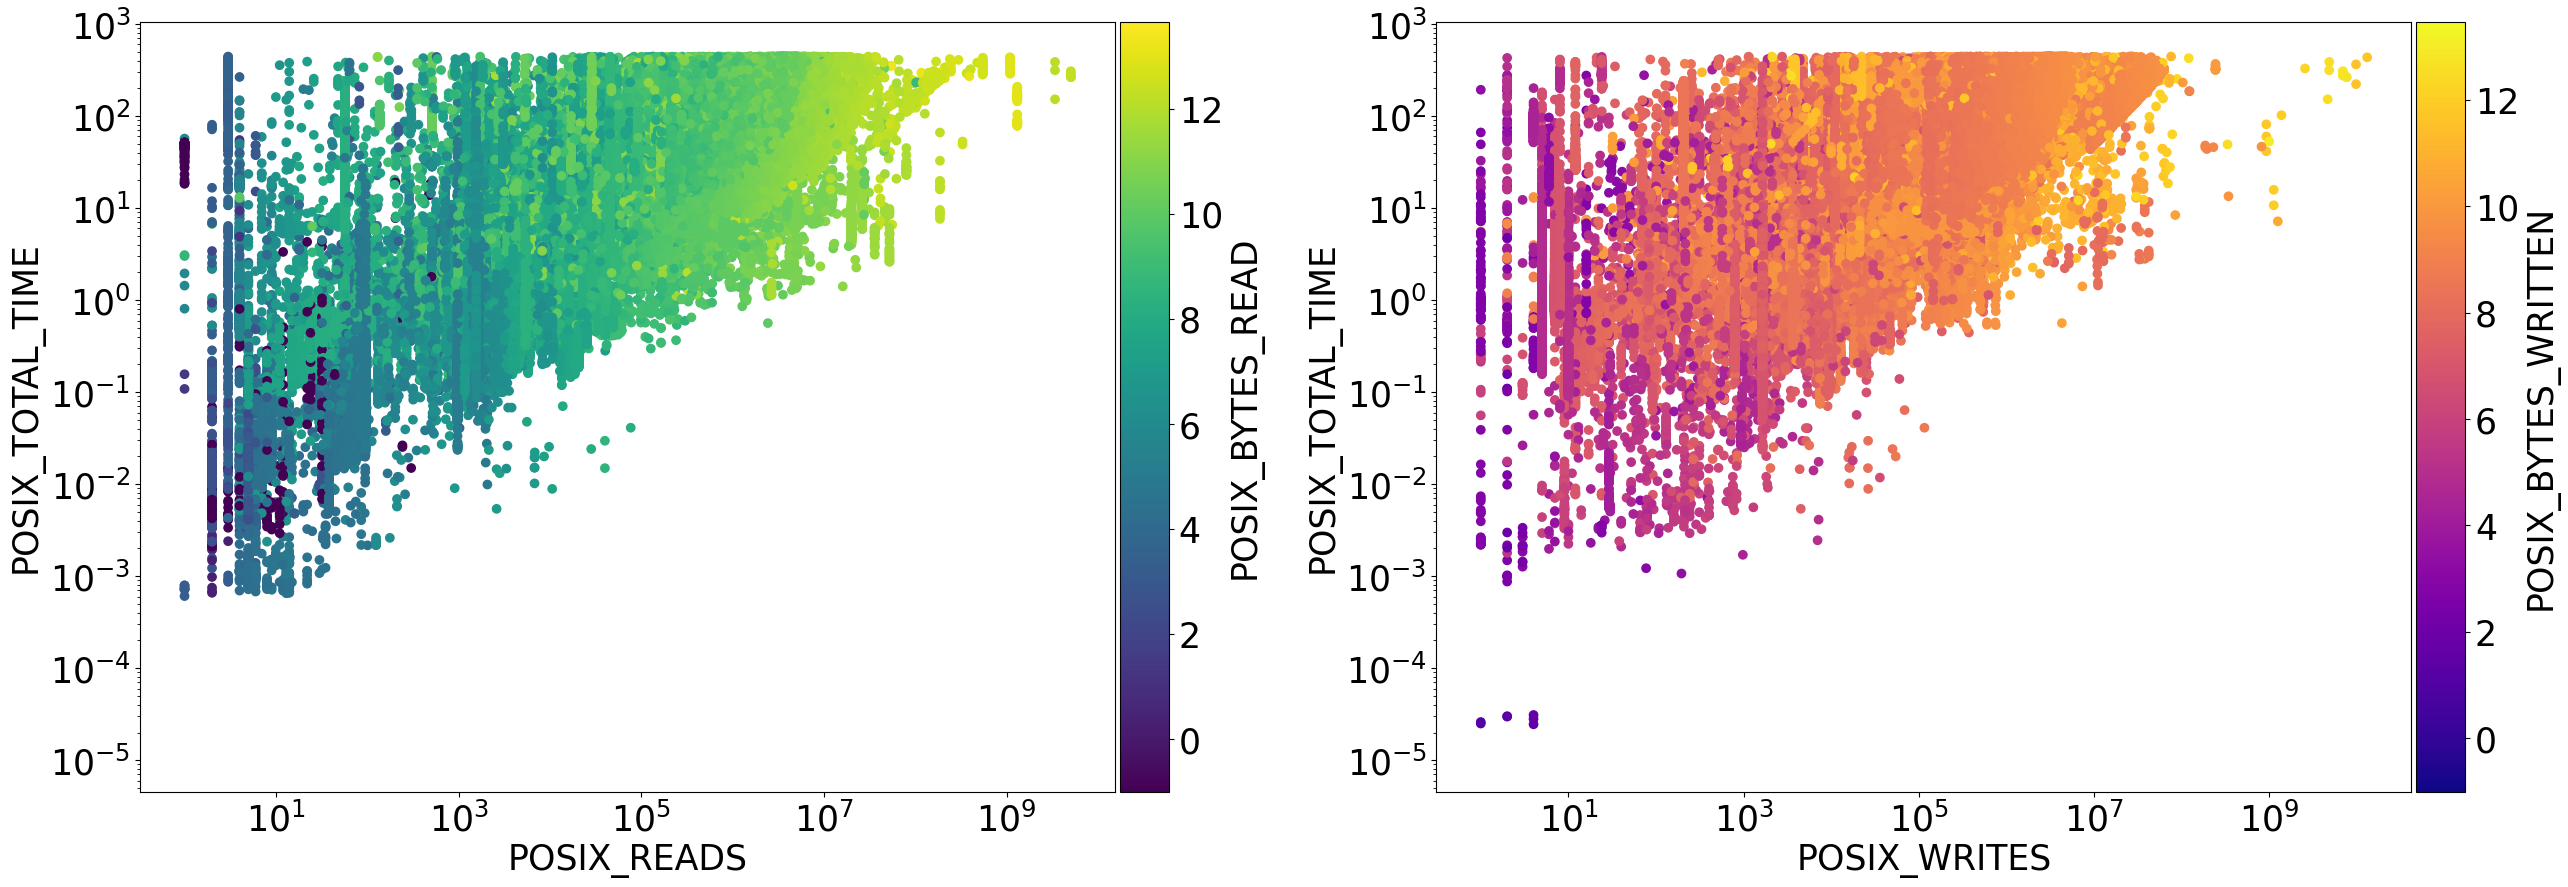

In [14]:
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True))

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [15]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.5600020359802962

In [16]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.31298531266436297